### Data cleaning and exploration

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

In [76]:
dataset = '../Data/Animal Dataset.csv'
df_animals =  pd.read_csv(dataset, header=0)

In [77]:
df_animals.head()

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12


In [78]:
df_animals.shape

(205, 16)

##### Checking for the different types in the dataset

In [79]:
df_animals.dtypes

Animal                     object
Height (cm)                object
Weight (kg)                object
Color                      object
Lifespan (years)           object
Diet                       object
Habitat                    object
Predators                  object
Average Speed (km/h)       object
Countries Found            object
Conservation Status        object
Family                     object
Gestation Period (days)    object
Top Speed (km/h)           object
Social Structure           object
Offspring per Birth        object
dtype: object

##### Checking for null/missing values

In [80]:
df_animals.isna().sum()

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Habitat                    0
Predators                  0
Average Speed (km/h)       0
Countries Found            0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
dtype: int64

In [81]:
columns_to_keeo = [
    "Animal",
    "Height (cm)",
    "Weight (kg)",
    "Lifespan (years)",
    "Diet",
    "Habitat",
    "Average Speed (km/h)",
    "Countries Found",
    "Conservation Status",
    "Gestation Period (days)",
    "Social Structure",
    "Offspring per Birth"
]

df_animals = df_animals[columns_to_keeo]

##### Cleaning all values with "-", and changing from int to a float. 

In [82]:
def parse_range(val):
    if isinstance(val, str): # is this a string? if yes continue cleaning.
        val = re.sub(r"\(.*?\)", "", val) # removes anything in parenthesis. 
        val = val.strip() # removes the spaces after it. 

        # Checking for range, first for an "en dash" and second for a normal hyphen-minus
        if "–" in val: 
            try:
                low, high = val.split("–")
                return (float(low.strip()) + float(high.strip())) / 2
            except:
                return np.nan
        elif "-" in val:
            try: 
                low, high = val.split("-")
                return (float(low.strip()) + float(high.strip())) / 2
            except:
                return np.nan
            
        else: # for single values.
            try:
                return float(val.strip())
            except:
                return np.nan
    elif isinstance(val, (int, float)):
        return float(val)
    else:
        return np.nan



In [83]:
# applying my function to the needed columns that has a range. 

columns_with_range = [
    "Height (cm)",
    "Weight (kg)",
    "Lifespan (years)",
    "Average Speed (km/h)",
    "Gestation Period (days)",
    "Offspring per Birth"
]

for col in columns_with_range:
    df_animals[col] = df_animals[col].apply(parse_range)

In [84]:
df_animals.head() # checking to see if the function did as it was supposed to. 

,Animal,Height (cm),Weight (kg),Lifespan (years),Diet,Habitat,Average Speed (km/h),Countries Found,Conservation Status,Gestation Period (days),Social Structure,Offspring per Birth
0,Aardvark,117.5,52.5,25.0,Insectivore,"Savannas, Grasslands",40.0,Africa,Least Concern,225.0,Solitary,1.0
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5
2,African Elephant,290.0,4350.0,65.0,Herbivore,"Savannah, Forest",25.0,Africa,Vulnerable,650.0,Herd-based,1.0
3,African Lion,95.0,185.0,12.0,Carnivore,"Grasslands, Savannas",58.0,Africa,Vulnerable,101.5,Group-based,3.0
4,African Wild Dog,77.5,27.0,11.0,Carnivore,Savannahs,56.0,Sub-Saharan Africa,Endangered,70.0,Group-based,11.0


##### Checking the different countries, getting to learn if its by region, or specific country.

In [85]:
df_animals["Countries Found"].unique()


array(['Africa', 'Eastern and Southern Africa', 'Sub-Saharan Africa',
       'European Alps', 'Amazon Rainforest', 'North America',
       'Central and South America', 'Middle East, North Africa',
       'Middle East', 'Arctic regions', 'South America, Asia',
       'Asia (Southeast)', 'North Atlantic, Arctic', 'Worldwide',
       'Australia, New Zealand', 'Mexico', 'Madagascar',
       'Southeast Asia, South Asia',
       'Gibraltar, North Africa, Middle East', 'Australia',
       'India, Nepal, Bhutan', 'India, Bangladesh, Nepal',
       'Australia, New Zealand, Tasmania', 'Deep-sea regions',
       'Oceans worldwide', 'Eastern Pacific (GalÃ¡pagos Islands)',
       'Indo-Pacific region', 'Democratic Republic of Congo', 'Borneo',
       'South and Central America', 'North America, Europe, Asia',
       'Southeast Asia, South Asia, Indonesia', 'South America',
       'Africa, Iran, India', 'Central and West Africa', 'China',
       'Indian, Pacific Oceans', 'Western Indian Ocean', 'Asi

In [86]:
region_mapping = {
    'Africa': ['Africa', 'Eastern and Southern Africa', 'Central Africa', 'Central and West Africa',
               'East Africa', 'Eastern Africa', 'Eastern Africa, Horn of Africa',
               'Kalahari Desert, Africa', 'Madagascar', 'North Africa', 'Sub-Saharan Africa',
               'Tropical Central Tropical Africa'],

    'Asia': ['Asia', 'Asia (Southeast)', 'Asia, Africa', 'Asia, Australia', 'Asia, Russia',
             'Asia, Tibet', 'Central Asia, South Asia, Middle East', 'Central and South Asia',
             'China', 'China, Nepal, Bhutan, India', 'Himalayas, Central Asia',
             'India', 'India, Bangladesh, Nepal', 'India, Nepal, Bhutan', 'India, Southeast Asia',
             'Indian subcontinent', 'Indonesia', 'Indonesia, Malaysia', 'Japan, China, North Korea',
             'Japan, China, Southeast Asia', 'Middle East', 'Middle East, North Africa',
             'Southeast Asia', 'Southeast Asia, Philippines', 'Southeast Asia, South Asia',
             'Southeast Asia, South Asia, Indonesia', 'Vietnam, Laos'],

    'Europe': ['Europe', 'Europe, Asia', 'European Alps', 'Spain, Portugal'],

    'Americas': ['Americas', 'Amazon Basin', 'Amazon Rainforest', 'Argentina', 'Argentina, Chile',
                 'Brazil, Southeastern Bahia', 'Central America', 'Central and South America',
                 'Gulf of California, Mexico', 'Mexico', 'North America',
                 'North, Central, and South America', 'South America', 'South America, Asia',
                 'South and Central America', 'Southwestern United States, Mexico',
                 'Western Colombia'],

    'Oceania': ['Australia', 'Australia, New Guinea', 'Australia, New Zealand',
                'Australia, New Zealand, Tasmania', 'New Zealand', 'Northern Australia',
                'Papua New Guinea, Indonesia', 'Sumatra', 'Tasmania, Australia',
                'Western Australia'],

    'Arctic': ['Antarctica', 'Arctic', 'Arctic regions', 'Arctic, Atlantic Ocean',
               'Arctic, North America', 'Arctic, Subarctic', 'North Atlantic, Arctic',
               'Siberia, Alaska'],

    # Additional mappings for mixed/global/marine
    'Africa, Asia, Americas': ['Africa', 'Asia', 'Americas'],
    'Africa, Asia, Australia, Oceania': ['Africa', 'Asia', 'Oceania'],
    'Africa, Iran, India': ['Africa', 'Asia'],
    'Eurasia, North Africa, Americas': ['Europe', 'Asia', 'Africa', 'Americas'],
    'Eurasia, North America, North Africa': ['Europe', 'Asia', 'North America', 'Africa'],
    'Gibraltar, North Africa, Middle East': ['Europe', 'Africa', 'Asia'],
    'Indian Ocean, Western Pacific': ['Oceania', 'Asia'],
    'Indian, Pacific Oceans': ['Oceania', 'Asia', 'Americas'],
    'Indo-Pacific region': ['Asia', 'Oceania'],
    'North America, Europe, Asia': ['North America', 'Europe', 'Asia'],
    'Worldwide': ['Africa', 'Asia', 'Europe', 'Americas', 'Oceania', 'Arctic']  # catch-all
}

In [87]:
df_animals["Main Region"] = df_animals["Countries Found"].apply(
    lambda x: tag_regions(x)[0] if tag_regions(x) else None
)

In [88]:
main_regions = ['Africa', 'Asia', 'Europe', 'Americas', 'Oceania', 'Arctic']

# Initialize all as 0
for region in main_regions:
    df_animals[region] = 0

# Expand this into a reverse mapping: location -> [regions]
location_to_regions = {}
for region, loc_list in region_mapping.items():
    for loc in loc_list:
        location_to_regions.setdefault(loc.strip().lower(), []).append(region)

# Assign 1 if a region is present based on "Countries Found"
def tag_regions(location):
    if pd.isna(location):
        return []
    location_clean = location.strip().lower()
    matches = set()
    
    # Get matched region list if exact match is found
    for key in location_to_regions:
        if key in location_clean:
            matches.update(location_to_regions[key])
    return list(matches)

# Apply region tagging
for idx, row in df_animals.iterrows():
    matched_regions = tag_regions(row["Countries Found"])
    for region in matched_regions:
        if region in main_regions:
            df_animals.at[idx, region] = 1

In [89]:
# Define the columns you want to keep
keep_columns = ['Animal', 'Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Diet', 
                'Habitat', 'Average Speed (km/h)', 'Countries Found', 
                'Conservation Status', 'Gestation Period (days)', 'Social Structure', 
                'Offspring per Birth'] + main_regions + ['Main Region']

# Drop all others
df_animals = df_animals[[col for col in df_animals.columns if col in keep_columns]]

In [90]:
# This pulls only the regions that got a 1
df_animals["Main Region"] = df_animals[main_regions].apply(lambda row: ', '.join([r for r in main_regions if row[r] == 1]), axis=1)


In [91]:
df_animals[["Animal", "Countries Found"] + main_regions + ["Main Region"]].head(20)


,Animal,Countries Found,Africa,Asia,Europe,Americas,Oceania,Arctic,Main Region
0,Aardvark,Africa,1,0,0,0,0,0,Africa
1,Aardwolf,Eastern and Southern Africa,1,0,0,0,0,0,Africa
2,African Elephant,Africa,1,0,0,0,0,0,Africa
3,African Lion,Africa,1,0,0,0,0,0,Africa
4,African Wild Dog,Sub-Saharan Africa,1,0,0,0,0,0,Africa
5,Alpine Ibex,European Alps,0,0,1,0,0,0,Europe
6,Amazon Rainforest Frog,Amazon Rainforest,0,0,0,1,0,0,Americas
7,American Bison,North America,0,0,0,1,0,0,Americas
8,Anteater,Central and South America,0,0,0,1,0,0,Americas
9,Arabian Horse,"Middle East, North Africa",1,1,0,0,0,0,"Africa, Asia"


In [92]:
df_animals.head()


,Animal,Height (cm),Weight (kg),Lifespan (years),Diet,Habitat,Average Speed (km/h),Countries Found,Conservation Status,Gestation Period (days),Social Structure,Offspring per Birth,Main Region,Africa,Asia,Europe,Americas,Oceania,Arctic
0,Aardvark,117.5,52.5,25.0,Insectivore,"Savannas, Grasslands",40.0,Africa,Least Concern,225.0,Solitary,1.0,Africa,1,0,0,0,0,0
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Africa,1,0,0,0,0,0
2,African Elephant,290.0,4350.0,65.0,Herbivore,"Savannah, Forest",25.0,Africa,Vulnerable,650.0,Herd-based,1.0,Africa,1,0,0,0,0,0
3,African Lion,95.0,185.0,12.0,Carnivore,"Grasslands, Savannas",58.0,Africa,Vulnerable,101.5,Group-based,3.0,Africa,1,0,0,0,0,0
4,African Wild Dog,77.5,27.0,11.0,Carnivore,Savannahs,56.0,Sub-Saharan Africa,Endangered,70.0,Group-based,11.0,Africa,1,0,0,0,0,0


In [93]:
print(df_animals.columns.tolist())


['Animal', 'Height (cm)', 'Weight (kg)', 'Lifespan (years)', 'Diet', 'Habitat', 'Average Speed (km/h)', 'Countries Found', 'Conservation Status', 'Gestation Period (days)', 'Social Structure', 'Offspring per Birth', 'Main Region', 'Africa', 'Asia', 'Europe', 'Americas', 'Oceania', 'Arctic']


##### Labeling each row based on **extinction risk**

In [95]:
at_risk_statuses = ["Vulnerable", "Endangered", "Critically Endangered", "Extinct", "Extinct in the Wild"]

df_animals["At_Risk"] = df_animals["Conservation Status"].isin(at_risk_statuses)



## Plotting

#### 1. **Countplot of Conservation Status**

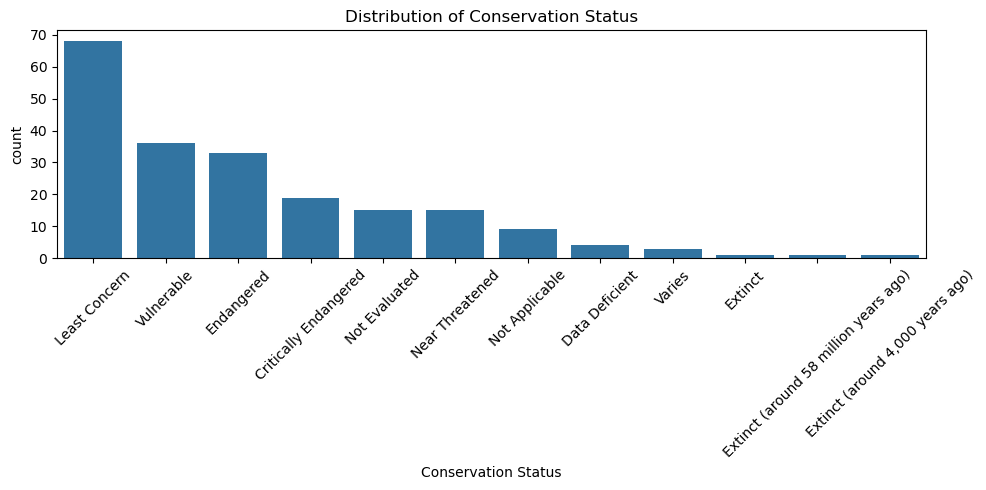

In [96]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_animals, x="Conservation Status", order=df_animals["Conservation Status"].value_counts().index)
plt.title("Distribution of Conservation Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The bar chart of Conservation Status shows that the majority of animals in the dataset are classified as “Least Concern.” Other categories like “Vulnerable” or “Endangered” are significantly less represented, while many statuses such as “Extinct” or “Not Evaluated” occur only a few times.

##### To reduce class imbalance and improve predictive performance, I engineered a binary feature, At_Risk, which combines all threatened categories under a single label. This enables more robust classification and supports clearer extinction risk analysis.

#### 2. **Countplot comparing offspring per birth between "At risk"/"Not at risk"**

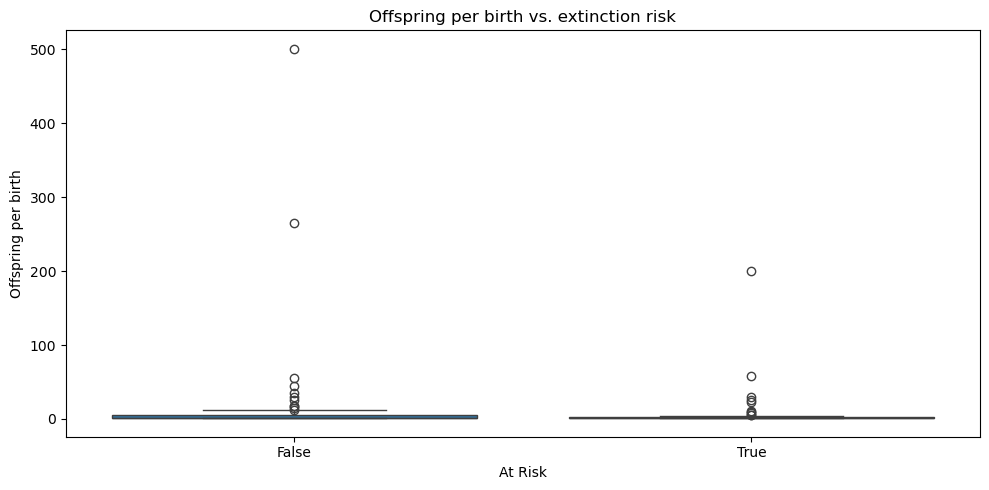

In [97]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_animals, x="At_Risk", y="Offspring per Birth")
plt.title("Offspring per birth vs. extinction risk")
plt.xlabel("At Risk")
plt.ylabel("Offspring per birth")
plt.tight_layout()
plt.show()

##### Comparing the at risk and the not at risk animals, we can see that the animals at risk actualy have fever offsprings than the ones that araen't at risk (we can see that by how the median is lower and the box is tighter near the bottom). As we can see there are massive outliers, which is to be expected from animals like turtles or frogs dropping hundreds of eggs. 

- This also supports my hypothesis **"Animals with low reproductive output are more vulnerable to extinction"**

#### 3. **Countplot: Diet vs. At_Risk**

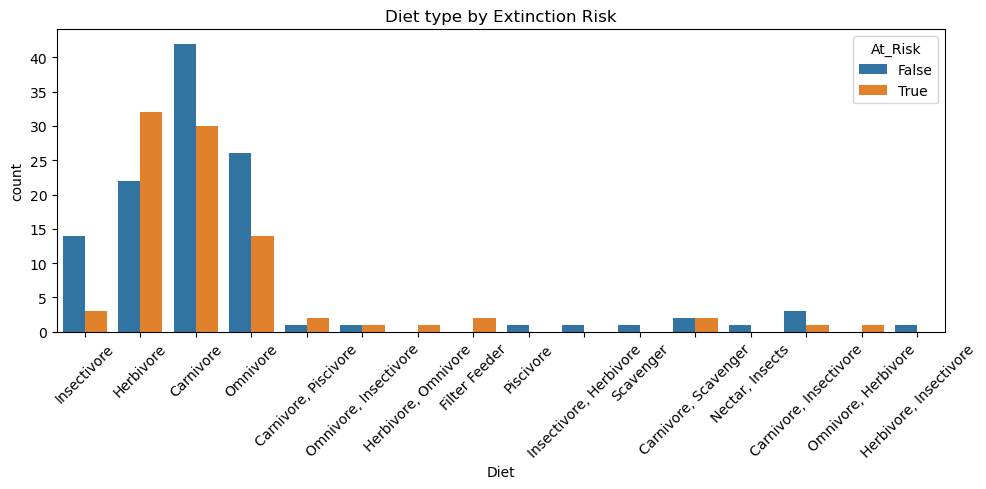

In [98]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_animals, x="Diet", hue="At_Risk")
plt.title("Diet type by Extinction Risk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The plot comparing diet type to extinction risk reveals a clear pattern: carnivores are significantly more likely to be at risk than other diet groups. This supports the hypothesis that higher trophic levels (carnivores) face greater extinction vulnerability due to food chain dependencies and ecological specialization.
##### Omnivores and insectivores appear more resilient, while herbivores show a moderate distribution across risk levels. This insight suggests that diet is a key feature to retain when training predictive models.

#### 4. **Correlation Heatmap** (Numerical only)

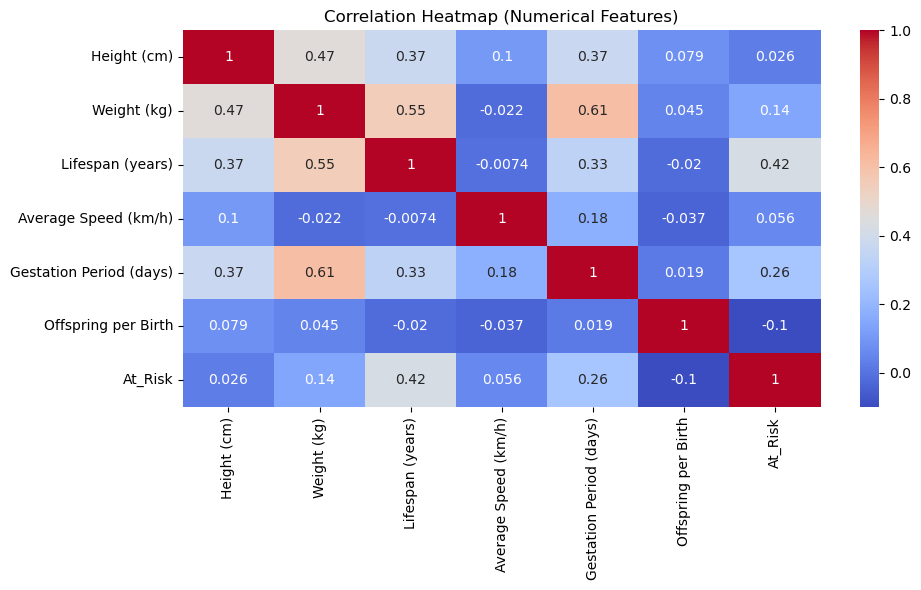

In [101]:
# Only select numeric columns
numeric_cols = df_animals.select_dtypes(include=["float64", "int64", "bool"])

# Drop region indicator columns
region_cols = ['Africa', 'Asia', 'Europe', 'Americas', 'Oceania', 'Arctic']
numeric_cols = numeric_cols.drop(columns=region_cols)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

##### The correlation heatmap reveals several meaningful patterns in the data. Notably, there is a positive correlation between weight, lifespan, and gestation period — suggesting that larger animals live longer and reproduce slower. Additionally, species with longer gestation periods and lifespans are more likely to be at risk of extinction, while those with more offspring tend to be safer. These findings support the hypothesis that slow-reproducing animals are more vulnerable to extinction pressures.

#### 5. **Number of At-Risk Animals per Region**

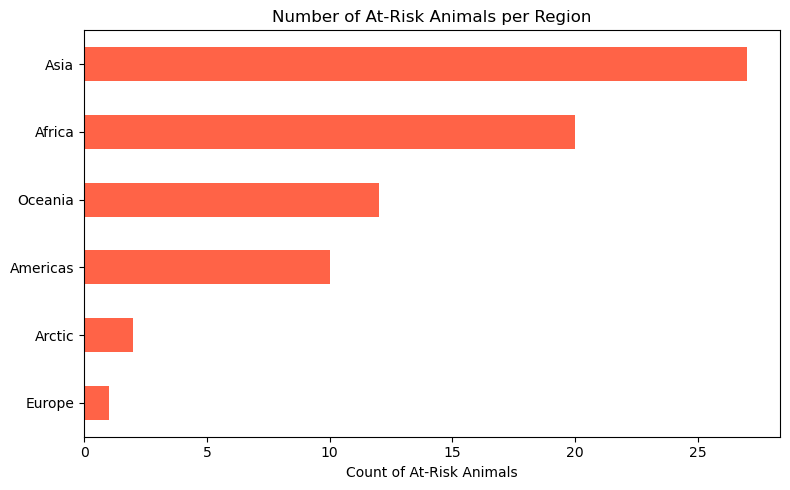

In [103]:

# Count of at-risk animals per region
region_risk_counts = df_animals[df_animals["At_Risk"] == True][main_regions].sum()

plt.figure(figsize=(8, 5))
region_risk_counts.sort_values().plot(kind="barh", color="tomato")
plt.title("Number of At-Risk Animals per Region")
plt.xlabel("Count of At-Risk Animals")
plt.tight_layout()
plt.show()


##### This bar chart supports the idea that regional climate and biodiversity context matter when assessing extinction risk. Regions like Asia and Africa, which show the highest number of at-risk animals, also experience rising temperatures and intense habitat pressure, aligning with your hypothesis that species in countries with sharply rising temperatures are more vulnerable.

##### Moreover, these regions tend to host many carnivorous and slow-reproducing species, giving early visual support to your ideas about reproductive traits and trophic level vulnerability.

##### This insight reinforces the relevance of combining biological traits (like gestation and diet) with regional climate data for better prediction of extinction risk

In [104]:
df_animals.to_csv("cleaned_animal_data.csv", index=False)
